In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [4]:
# generate sample data
# Create dummy data (e.g., study hours vs. exam score)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Study hours
Y = np.array([10, 20, 25, 40, 50, 65, 75, 85, 95, 110])  # Exam score


In [5]:
#Split Data Into Training and Testing Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [6]:
#Train the Model
model = LinearRegression()  # Create model
model.fit(X_train, Y_train)  # Train model on data


LinearRegression()

In [8]:
#  Get Model Parameters

m = model.coef_[0]  # Slope
b = model.intercept_  # Intercept

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")


Slope (m): 11.379310344827587
Intercept (b): -5.0862068965517295


In [9]:
# Make Predictions
Y_pred = model.predict(X_test)  # Predict values


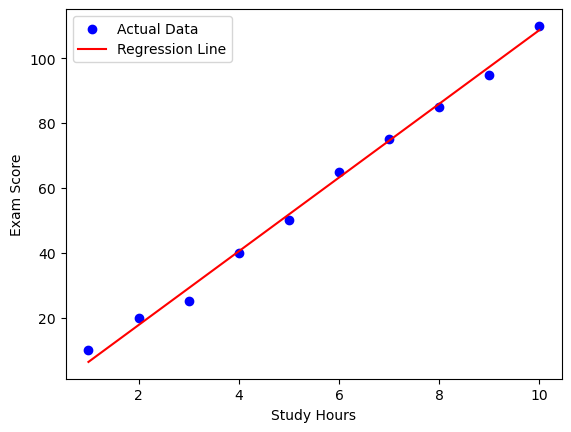

In [10]:
#Visualize the Regression Line
plt.scatter(X, Y, color='blue', label="Actual Data")  # Plot actual points
plt.plot(X, model.predict(X), color='red', label="Regression Line")  # Plot best fit line
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.show()


EXAMPLE 2

In [11]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [12]:
# Data preparation
# House size (independent variable)
X = np.array([750, 800, 850, 900, 950, 1000, 1100]).reshape(-1, 1)

# House price in $1000s (dependent variable)
Y = np.array([150, 180, 200, 220, 240, 260, 300])


In [13]:
#Train the Model
model = LinearRegression()
model.fit(X, Y)


LinearRegression()

In [14]:
# Get Model Parameters
m = model.coef_[0]  # Slope
b = model.intercept_  # Intercept

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")


Slope (m): 0.41803278688524576
Intercept (b): -157.78688524590152


In [15]:
# Make Predictions
size_new = np.array([[1050]])  # Predict price for 1050 sq ft house
predicted_price = model.predict(size_new)

print(f"Predicted Price for 1050 sq ft: ${predicted_price[0]}K")


Predicted Price for 1050 sq ft: $281.1475409836065K


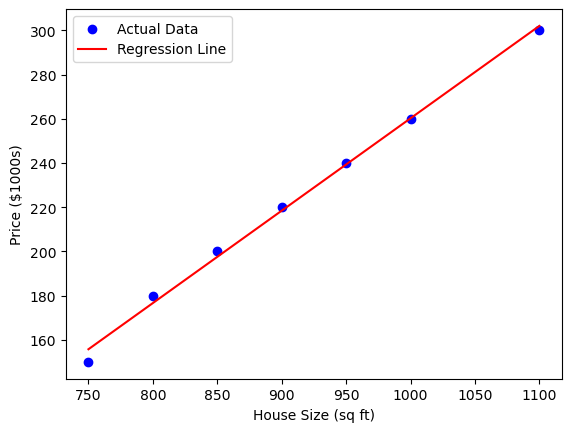

In [16]:
# Visualize the Regression Line
plt.scatter(X, Y, color='blue', label="Actual Data")  # Plot actual points
plt.plot(X, model.predict(X), color='red', label="Regression Line")  # Best-fit line
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price ($1000s)")
plt.legend()
plt.show()


Example: When to Apply Transformation in Linear Regression

In [17]:
#  Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [18]:
#  Load the Data
# Experience (X) and Salary (Y)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
Y = np.array([20, 25, 30, 40, 55, 75, 100, 130, 170, 220])


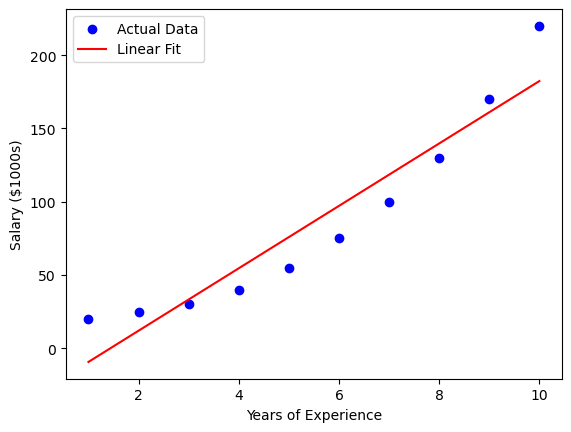

In [19]:
#  Fit a Simple Linear Regression Model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Plot results
plt.scatter(X, Y, color='blue', label="Actual Data")
plt.plot(X, Y_pred, color='red', label="Linear Fit")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($1000s)")
plt.legend()
plt.show()


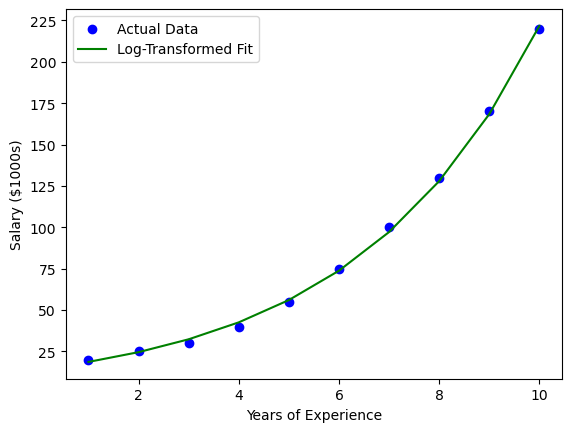

In [20]:
# applying log transformation
# Apply log transformation
Y_log = np.log(Y)

# Train new Linear Regression model
model_log = LinearRegression()
model_log.fit(X, Y_log)

# Predict and convert back
Y_pred_log = np.exp(model_log.predict(X))

# Plot results
plt.scatter(X, Y, color='blue', label="Actual Data")
plt.plot(X, Y_pred_log, color='green', label="Log-Transformed Fit")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($1000s)")
plt.legend()
plt.show()


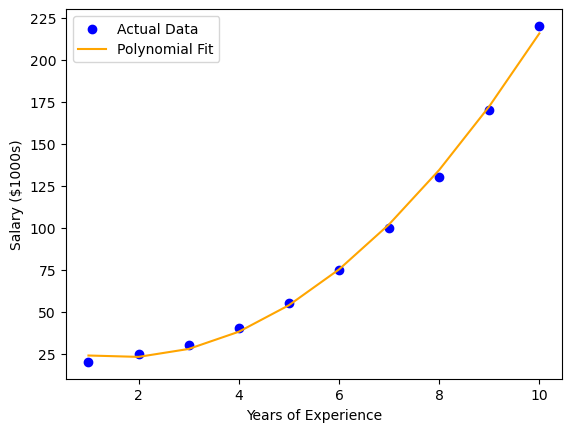

In [21]:
# applying polyonimial transformation
# Convert X to polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train Polynomial Regression Model
model_poly = LinearRegression()
model_poly.fit(X_poly, Y)

# Predict
Y_pred_poly = model_poly.predict(X_poly)

# Plot results
plt.scatter(X, Y, color='blue', label="Actual Data")
plt.plot(X, Y_pred_poly, color='orange', label="Polynomial Fit")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($1000s)")
plt.legend()
plt.show()


Example 3

In [22]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [23]:
# loading the data
# Experience (X) and Salary (Y)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
Y = np.array([20, 25, 30, 40, 55, 75, 100, 130, 170, 220])


In [39]:
#Train Simple Linear Regression Model
model = LinearRegression()
model.fit(X, Y)

# predictions
Y_pred = model.predict(X)

# compute residuals
residuals = Y - Y_pred



In [25]:
# Plot Residuals to Check Assumptions

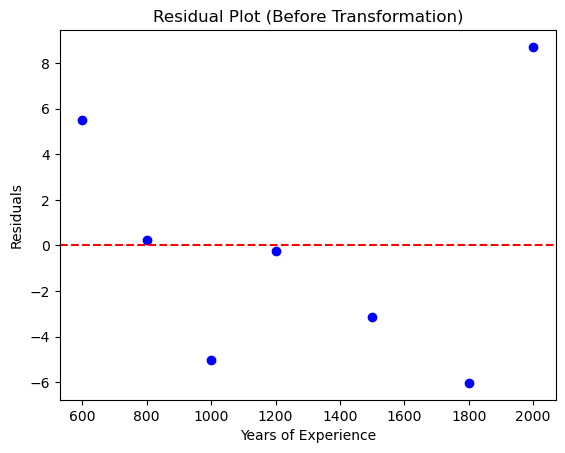

In [40]:
#Residual Scatter Plot
plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at y=0
plt.xlabel("Years of Experience")
plt.ylabel("Residuals")
plt.title("Residual Plot (Before Transformation)")
plt.show()


In [27]:
#If residuals are randomly scattered, the model is fine.
#If residuals follow a pattern (e.g., U-shape or fan-shape), transformation is needed.

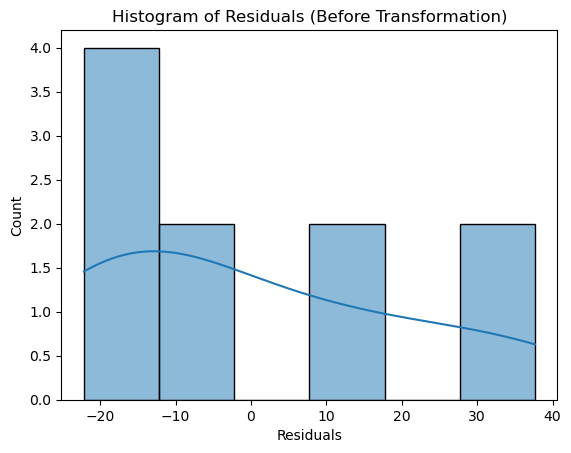

In [28]:
#  Histogram of Residuals
# Residuals should be normally distributed
sns.histplot(residuals, kde=True, bins=6)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals (Before Transformation)")
plt.show()



In [29]:
#If the histogram looks like a normal distribution, the model is fine.
#If residuals are skewed, apply log transformation.

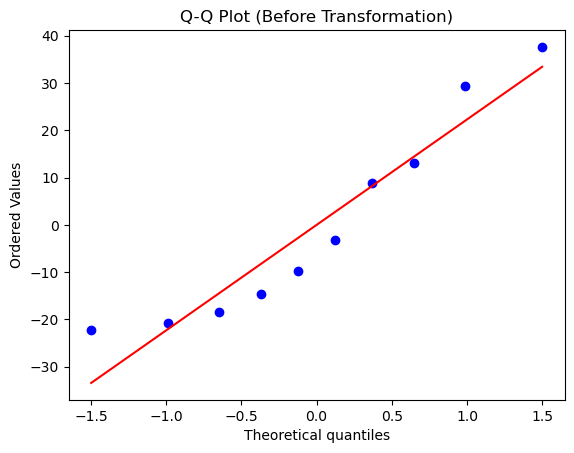

In [30]:
# Q-Q Plot (Normality Check)
# Check if residuals follow a normal distribution.
import scipy.stats as stats
import pylab

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.title("Q-Q Plot (Before Transformation)")
pylab.show()


In [31]:
# If points lie on a straight line, residuals are normal.
# If points deviate, apply a transformation.

In [32]:
#  Applying Log Transformation and Rechecking Residuals

In [33]:
# Apply log transformation
Y_log = np.log(Y)

# Train new model
model_log = LinearRegression()
model_log.fit(X, Y_log)

# Compute residuals after transformation
Y_pred_log = np.exp(model_log.predict(X))  # Convert back from log
residuals_log = Y - Y_pred_log


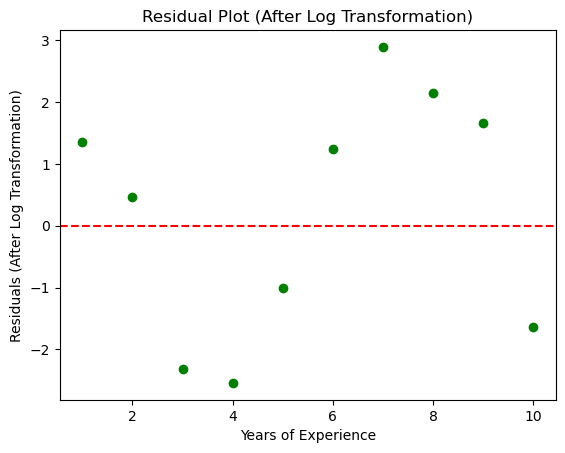

In [34]:
# Replot Residual Scatter Plot
plt.scatter(X, residuals_log, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Years of Experience")
plt.ylabel("Residuals (After Log Transformation)")
plt.title("Residual Plot (After Log Transformation)")
plt.show()


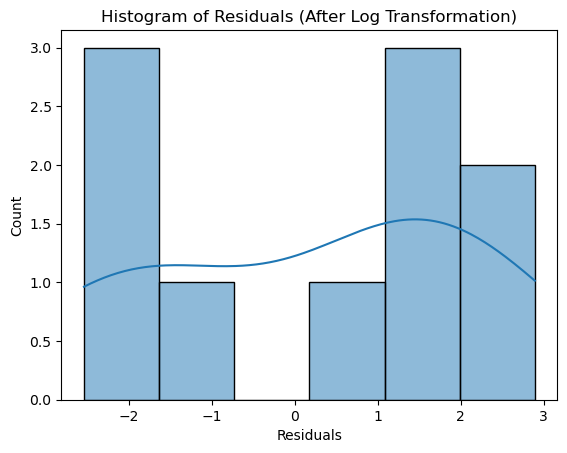

In [35]:
# Replot Histogram of Residuals
sns.histplot(residuals_log, kde=True, bins=6)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals (After Log Transformation)")
plt.show()


 Example 4

In [37]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [38]:
# loading the data
X = np.array([600,800,1000,1200,1500,1800,2000]).reshape(-1,1)
Y = np.array([150,180,210,250,300,350,400])

In [41]:
# train the model
model = LinearRegression()
model.fit(X, Y)

#Predictions
Y_pred = model.predict(X)

In [42]:
# Get Model Parameters
m = model.coef_[0]  # Slope
b = model.intercept_  # Intercept

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")


Slope (m): 0.17628318584070796
Intercept (b): 38.725663716814154


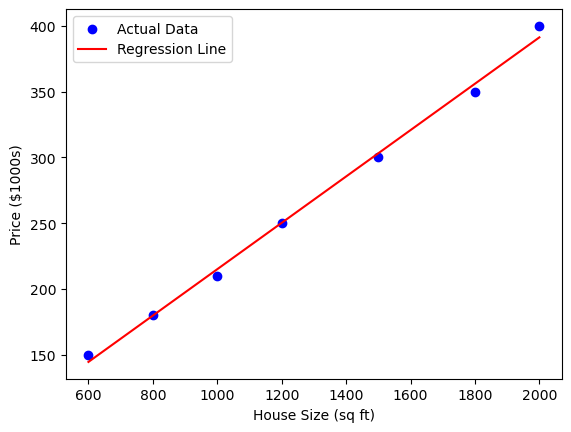

In [43]:
# Visualize the Regression Line
plt.scatter(X, Y, color='blue', label="Actual Data")  # Plot actual points
plt.plot(X, model.predict(X), color='red', label="Regression Line")  # Best-fit line
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price ($1000s)")
plt.legend()
plt.show()


In [45]:
# predict for 1700sq
# Make Predictions
size_new = np.array([[1700]])  # Predict price for 1700 sq ft house
predicted_price = model.predict(size_new)

print(f"Predicted Price for 1700 sq ft: ${predicted_price[0]}K")


Predicted Price for 1700 sq ft: $338.4070796460177K


In [46]:
# computing residuals
residuals = Y - Y_pred 

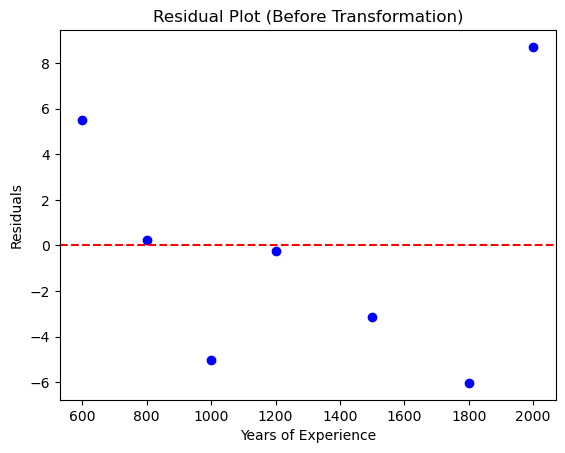

In [47]:
#Residual Scatter Plot
plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at y=0
plt.xlabel("Years of Experience")
plt.ylabel("Residuals")
plt.title("Residual Plot (Before Transformation)")
plt.show()

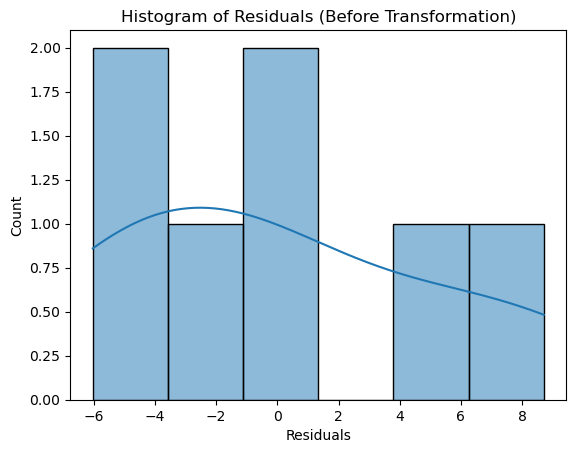

In [48]:
#  Histogram of Residuals
# Residuals should be normally distributed
sns.histplot(residuals, kde=True, bins=6)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals (Before Transformation)")
plt.show()



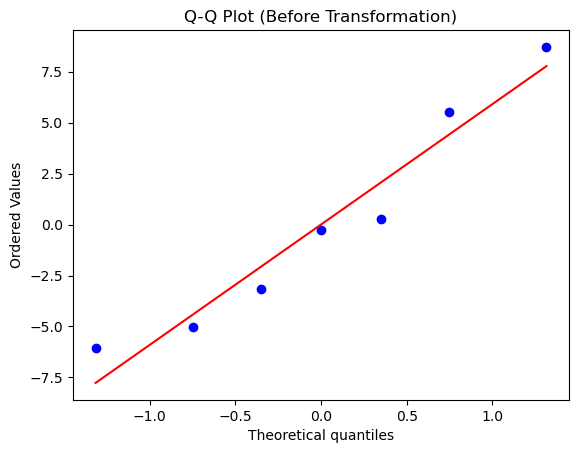

In [49]:
# Q-Q Plot (Normality Check)
# Check if residuals follow a normal distribution.
import scipy.stats as stats
import pylab

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.title("Q-Q Plot (Before Transformation)")
pylab.show()


In [1]:
#  Import Libraries & Load Data
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
df = sns.load_dataset("tips")

# Display first few rows
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


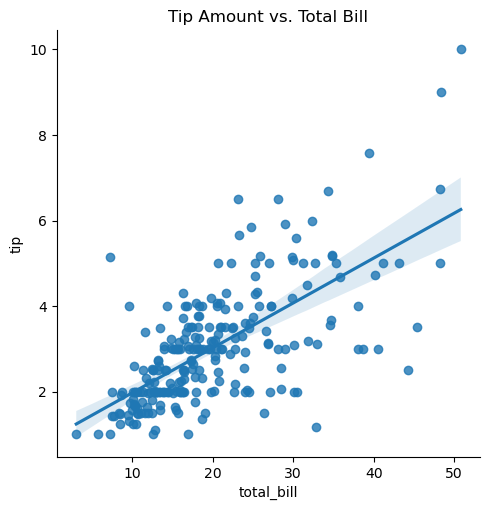

In [2]:
# visualization
# Scatter plot with regression line
sns.lmplot(x="total_bill", y="tip", data=df)
plt.title("Tip Amount vs. Total Bill")
plt.show()


In [3]:
# modeling
import numpy as np
from sklearn.linear_model import LinearRegression

# Define X (independent) and y (dependent) variables
X = df[['total_bill']]  # Independent variable
y = df['tip']  # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")


Intercept: 0.9202696135546731
Slope: 0.10502451738435337


In [4]:
# making prediction
# Predict tip for a $60 bill
predicted_tip = model.predict([[60]])
print(f"Predicted tip for a $60 bill: ${predicted_tip[0]:.2f}")


Predicted tip for a $60 bill: $7.22


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
